<a href="https://colab.research.google.com/github/undanielrojo/Trabajos_salle/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Proyecto 1 Clase Machine_learning*

> 

Santiago Yate - 63202046
Daniel Carranza - 63171111


1. importacion de libreria 


In [ ]:
!pip install wooldridge pingouin missingno

import wooldridge as wd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as st
import pingouin as pg

import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer, MissingIndicator
from scipy.spatial.distance import mahalanobis

Importacion de data


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_1.csv')

Exploracion inicial de datos Datos

In [ ]:
dataset.head()

,user_id,gender,wage,purchased,birth_day
0,217,Female,NaN,0,1983-08-06
1,226,Female,146500.0,1,1972-01-28
2,697,Male,NaN,1,1981-12-12
3,743,Female,NaN,0,1983-05-26
4,63,Female,140500.0,1,1967-11-02


In [ ]:
dataset.tail()

,user_id,gender,wage,purchased,birth_day
1169,636,Male,76500.0,0,1970-08-26
1170,320,Female,143500.0,1,1970-04-07
1171,136,Female,NaN,1,1968-12-28
1172,721,Male,148000.0,1,1993-11-23
1173,471,man,60500.0,0,1984-06-02


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    1174 non-null   int64  
 1   gender     1174 non-null   object 
 2   wage       930 non-null    float64
 3   purchased  1174 non-null   int64  
 4   birth_day  1174 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.0+ KB


In [ ]:
from datetime import datetime
datetime.today()

datetime.datetime(2023, 3, 7, 15, 55, 35, 145221)

In [ ]:
datetime.today() - pd.to_datetime(dataset["birth_day"])

0      14458 days 15:55:37.928879
1      18666 days 15:55:37.928879
2      15060 days 15:55:37.928879
3      14530 days 15:55:37.928879
4      20214 days 15:55:37.928879
                  ...            
1169   19186 days 15:55:37.928879
1170   19327 days 15:55:37.928879
1171   19792 days 15:55:37.928879
1172   10696 days 15:55:37.928879
1173   14157 days 15:55:37.928879
Name: birth_day, Length: 1174, dtype: timedelta64[ns]

In [ ]:
Fecha_actual =((datetime.today() - pd.to_datetime(dataset["birth_day"]))/(np.timedelta64(1,'Y'))).round()

In [ ]:
Fecha_actual

0       40.0
1       51.0
2       41.0
3       40.0
4       55.0
        ... 
1169    53.0
1170    53.0
1171    54.0
1172    29.0
1173    39.0
Name: birth_day, Length: 1174, dtype: float64

Cantidad de años que tiene la persona de acuerdo a su fecha de nacimiento

In [ ]:
dataset['Fecha_actual'] = Fecha_actual

In [ ]:
dataset

,user_id,gender,wage,purchased,birth_day,Fecha_actual
0,217,Female,NaN,0,1983-08-06,40.0
1,226,Female,146500.0,1,1972-01-28,51.0
2,697,Male,NaN,1,1981-12-12,41.0
3,743,Female,NaN,0,1983-05-26,40.0
4,63,Female,140500.0,1,1967-11-02,55.0
...,...,...,...,...,...,...
1169,636,Male,76500.0,0,1970-08-26,53.0
1170,320,Female,143500.0,1,1970-04-07,53.0
1171,136,Female,NaN,1,1968-12-28,54.0
1172,721,Male,148000.0,1,1993-11-23,29.0


dataset = dataset




In [ ]:
dataset['gender'].unique()

array(['Female', 'Male', 'woman', 'man'], dtype=object)

In [ ]:
dataset['gender'] = [np.random.choice([i, i.upper()[:3]], p=(0.8,0.2)) for i in dataset['gender']]


In [ ]:
dataset['gender'].value_counts(normalize=True)

Female    0.345826
Male      0.341567
FEM       0.094549
MAL       0.087734
woman     0.058773
man       0.040034
MAN       0.016184
WOM       0.015332
Name: gender, dtype: float64

Limpiando la data, reduciendo sus varaibles en Female y Male

In [ ]:
dataset = (dataset
        .replace({'MAL':'Male',
                  'FEM':'Female'}))
dataset = (dataset
        .replace({'MAN':'Male',
                  'woman':'Female'}))
dataset = (dataset
        .replace({'man':'Male',
                  'WOM':'Female'}))
dataset['gender'].value_counts()

Female    604
Male      570
Name: gender, dtype: int64

In [ ]:
dataset = (dataset
        .replace({'gender':{1:'Female',
                            0:'Male'}}))

Nombrar 0 Male, 1 Female

In [ ]:
dataset

,user_id,gender,wage,purchased,birth_day,Fecha_actual
0,217,Female,NaN,0,1983-08-06,40.0
1,226,Female,146500.0,1,1972-01-28,51.0
2,697,Male,NaN,1,1981-12-12,41.0
3,743,Female,NaN,0,1983-05-26,40.0
4,63,Female,140500.0,1,1967-11-02,55.0
...,...,...,...,...,...,...
1169,636,Male,76500.0,0,1970-08-26,53.0
1170,320,Female,143500.0,1,1970-04-07,53.0
1171,136,Female,NaN,1,1968-12-28,54.0
1172,721,Male,148000.0,1,1993-11-23,29.0


In [ ]:
dataset.duplicated().sum()

174

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.isna().sum()


user_id           0
gender            0
wage            214
purchased         0
birth_day         0
Fecha_actual      0
dtype: int64

Media de salario para personas

In [ ]:
dataset['wage'].mean()



72580.15267175573

Media de salario para personas


In [ ]:
dataset['wage'].median()

71750.0

Mediana del salario de todas las personas

<AxesSubplot:>

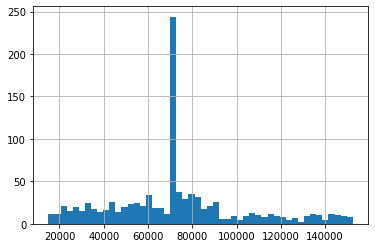

In [ ]:
dataset['wage'].fillna(dataset['wage'].median()).hist(bins=50)

<AxesSubplot:>

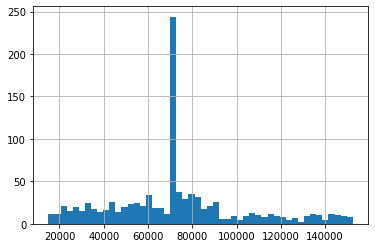

In [ ]:
dataset['wage'].fillna(dataset['wage'].mean()).hist(bins=50)

Condicionamiento de la DATA

In [ ]:

dataset_imput = dataset.copy()

In [ ]:

condition_mean = dataset_imput.groupby(['gender', 'purchased'])['wage'].transform('mean')
condition_median = dataset_imput.groupby(['gender', 'purchased'])['wage'].transform('median')

<AxesSubplot:>

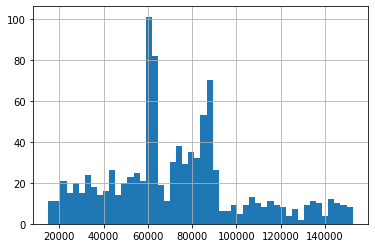

In [ ]:
dataset_imput['wage'].fillna(condition_mean).hist(bins=50)

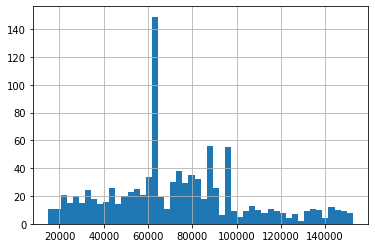

In [ ]:
dataset = dataset_imput['wage'].fillna(condition_median).hist(bins=50)

In [ ]:
dataset_imput['wage'].fillna(condition_median,inplace=True)

In [ ]:
def outliers_iqr(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lim_sup = q3 + (iqr * 1.5)
  lim_inf = q1 - (iqr * 1.5)
  return df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]
     

<AxesSubplot:>

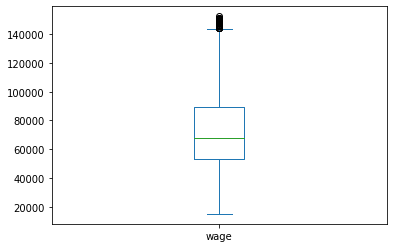

In [ ]:
dataset_imput['wage'].plot(kind='box')

<AxesSubplot:>

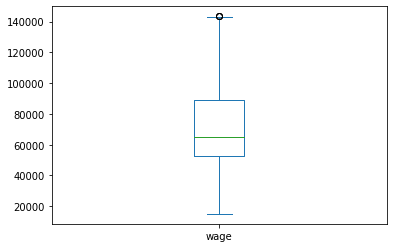

In [ ]:

dataset_no_out = outliers_iqr(dataset_imput, 'wage')
dataset_no_out['wage'].plot(kind='box')

In [ ]:
dataset_imput['Fecha_actual'] = Fecha_actual

In [ ]:
dataset_imput = (dataset_imput
        .replace({'MAL':'Male',
                  'FEM':'Female'}))
dataset_imput = (dataset_imput
        .replace({'MAN':'Male',
                  'woman':'Female'}))
dataset_imput = (dataset_imput
        .replace({'man':'Male',
                  'WOM':'Female'}))
dataset_imput['gender'].value_counts()

Female    522
Male      478
Name: gender, dtype: int64

In [ ]:

dataset_imput = (dataset_imput
        .replace({'gender':{1:'Female',
                            0:'Male'}}))

In [ ]:
dataset_imput = (dataset_imput
        .replace({'gender':{'Female':1,
                            'Male':0}}))

Data renombrada con datos como id, genero, salario, gasto o no, fecha de nacimiento y edad.

In [ ]:
dataset_imput

,user_id,gender,wage,purchased,birth_day,Fecha_actual
0,217,1,63500.0,0,1983-08-06,40.0
1,226,1,146500.0,1,1972-01-28,51.0
2,697,0,88750.0,1,1981-12-12,41.0
3,743,1,63500.0,0,1983-05-26,40.0
4,63,1,140500.0,1,1967-11-02,55.0
...,...,...,...,...,...,...
1167,305,1,22500.0,1,1969-03-09,54.0
1169,636,0,76500.0,0,1970-08-26,53.0
1170,320,1,143500.0,1,1970-04-07,53.0
1172,721,0,148000.0,1,1993-11-23,29.0


Data con datos de gender actualizados a 0 o 1

In [ ]:
dataset_imput

,gender,wage,purchased,Fecha_actual
0,1,64500.0,0,40.0
1,1,146500.0,1,51.0
2,0,89250.0,1,41.0
3,1,64500.0,0,40.0
4,1,140500.0,1,55.0
...,...,...,...,...
1169,0,76500.0,0,53.0
1170,1,143500.0,1,53.0
1171,1,95000.0,1,54.0
1172,0,148000.0,1,29.0


limpiar ID y birth_day

In [ ]:
dataset_imput.drop(columns=['birth_day','user_id'],inplace = True)

In [ ]:
isol = IsolationForest(random_state=0).fit(dataset_imput)
dataset_imput['isol_forest'] = isol.predict(dataset_imput)
dataset_imput['isol_forest'].value_counts()

-1    523
 1    477
Name: isol_forest, dtype: int64

In [ ]:
dataset_imput['Categorizacion_salario'] = pd.cut(dataset_imput['wage'],4)
dataset_imput['Categorizacion_edad'] = pd.cut(dataset_imput['Fecha_actual'],4)

In [ ]:
dataset_imput.pivot_table(index=['Categorizacion_edad' ], 
                     values='purchased',
                     aggfunc=['mean'])

,mean
,purchased
Categorizacion_edad,
"(17.954, 29.5]",0.039106
"(29.5, 41.0]",0.231806
"(41.0, 52.5]",0.568562
"(52.5, 64.0]",0.920530


la media aritmetica refleja que el 92% de las personas (hombres y mujeres) entre 52,5 y 64 años hizo la compra, el 56,85% de la personas (hombres y mujeres) entre 41 y 52,5 años compro, tan solo el 23,18% de las personas (hombres y mujeres) entre 29,5 y 41 años compro con su salario y el 3,91% de personas (hombres y mujeres) entre 17,9 y 29,5 años compro

In [ ]:
dataset_imput.pivot_table(index=['Categorizacion_salario'], 
                     values='purchased',
                     aggfunc=['mean'])

,mean
,purchased
Categorizacion_salario,
"(14862.5, 49375.0]",0.448598
"(49375.0, 83750.0]",0.087527
"(83750.0, 118125.0]",0.770563
"(118125.0, 152500.0]",0.897959


De acuerdo a la media aritmetica, notamos que es mas probable que  las personas con mayor salario compren, , sin embargo el las personas que cuentan con un salario entre 49.375 y 83.750 son las que menos compran con una probabilidad de 8.75%

In [ ]:
dataset_imput.pivot_table(index=['gender' ], 
                     values='purchased',
                     aggfunc=['mean'])

,mean
,purchased
gender,
0,0.378661
1,0.423372


Segun la media aritmetica, las mujeres compran mas que los hombres, por una diferencia de de 4.47%

In [ ]:
dataset_imput.pivot_table(index=['gender','Categorizacion_salario','Categorizacion_edad' ], 
                     values='purchased',
                     aggfunc=['mean'])

mean
                                                  purchased
gender Categorizacion_salario Categorizacion_edad          
0      (14862.5, 49375.0]     (17.954, 29.5]       0.000000
                              (29.5, 41.0]         0.000000
                              (41.0, 52.5]         0.878788
                              (52.5, 64.0]         1.000000
       (49375.0, 83750.0]     (17.954, 29.5]       0.000000
                              (29.5, 41.0]         0.050847
                              (41.0, 52.5]         0.145161
                              (52.5, 64.0]         0.846154
       (83750.0, 118125.0]    (17.954, 29.5]       0.000000
                              (29.5, 41.0]         0.771429
                              (41.0, 52.5]         1.000000
                              (52.5, 64.0]         1.000000
       (118125.0, 152500.0]   (17.954, 29.5]       1.000000
                              (29.5, 41.0]         1.000000
                              (41.0, 52.5]         0.800000
                              (52.5, 64.0]         1.000000
1      (14862.5, 49375.0]     (17.954, 29.5]       0.000000
                              (29.5, 41.0]         0.000000
                              (41.0, 52.5]         0.710526
                              (52.5, 64.0]         0.906250
       (49375.0, 83750.0]     (17.954, 29.5]       0.000000
                              (29.5, 41.0]         0.028302
                              (41.0, 52.5]         0.109091
                              (52.5, 64.0]         0.714286
       (83750.0, 118125.0]    (17.954, 29.5]       0.200000
                              (29.5, 41.0]         0.666667
                              (41.0, 52.5]         0.860465
                              (52.5, 64.0]         0.933333
       (118125.0, 152500.0]   (17.954, 29.5]       0.500000
                              (29.5, 41.0]         0.947368
                              (41.0, 52.5]         0.840000
                              (52.5, 64.0]         0.846154

Por ultimo, las compras son menos probables para edades tempranas, sin embargo si un joven entre 17 y 29.5 años gana 118125 a 152500 es mas probable que compre, las personas mayores a 40 años en general .
Las mujeres acostumbran a comprar mas mientras ganan mas, de igual forma, es mas probable que compran mientras el rango de edad sea mayor, sin embargo, las mujeres de 29.5 a 41 años con el salario mas alto son las que mas probablemente compren.

In [ ]:
dataset_imput.pivot_table(index=['Categorizacion_edad' ], 
                     values='wage',
                     aggfunc=['mean','median'])



,mean,median
,wage,wage
Categorizacion_edad,,
"(17.954, 29.5]",61597.765363,62500.0
"(29.5, 41.0]",73034.366577,63500.0
"(41.0, 52.5]",74971.571906,73500.0
"(52.5, 64.0]",82996.688742,88750.0


La media y la mediana del salario para personas entre 17 y 29,5 años es casi la misma, sin embargo la mediana en el salario para personas entre 29,5 y 52,5 es mayor que su media, por ultimo la media de salario de las personas entre 52,5 y 64 años es de 82.996, mientras que la mediana es de 88.750

In [ ]:
dataset_imput.pivot_table(index=['gender'], 
                     values='wage',
                     aggfunc=['mean','median'])


,mean,median
,wage,wage
gender,,
0,71076.882845,66500.0
1,74896.551724,69500.0


la media y mediana aritmetica de los hombres y las mujeres en el salario varia alrededor de 3000, mientras que para las mujeres su salario es de 74896, los hombres ganan 71076, para la mediana, el salario estimado es de 66500 mientrasa que las muejres es de 69500